In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os
import sys
import random
import Levenshtein as Lev
from scipy.special import softmax
import seaborn as sns
sys.path.append('../../')
from common.plot_style_utils import set_pub_plot_context
np.random.seed(42)
random.seed(42)
%matplotlib inline


In [2]:
# https://www.ncbi.nlm.nih.gov/nuccore/JQ394803.1?report=fasta
plasmid = """TACTAGTAGCGGCCGCTGCAGTCCGGCAAAAAAACGGGCAAGGTGTCACCACCCTGCCCTTTTTCTTTAA
AACCGAAAAGATTACTTCGCGTTATGCAGGCTTCCTCGCTCACTGACTCGCTGCGCTCGGTCGTTCGGCT
GCGGCGAGCGGTATCAGCTCACTCAAAGGCGGTAATCTCGAGTCCCGTCAAGTCAGCGTAATGCTCTGCC
AGTGTTACAACCAATTAACCAATTCTGATTAGAAAAACTCATCGAGCATCAAATGAAACTGCAATTTATT
CATATCAGGATTATCAATACCATATTTTTGAAAAAGCCGTTTCTGTAATGAAGGAGAAAACTCACCGAGG
CAGTTCCATAGGATGGCAAGATCCTGGTATCGGTCTGCGATTCCGACTCGTCCAACATCAATACAACCTA
TTAATTTCCCCTCGTCAAAAATAAGGTTATCAAGTGAGAAATCACCATGAGTGACGACTGAATCCGGTGA
GAATGGCAAAAGCTTATGCATTTCTTTCCAGACTTGTTCAACAGGCCAGCCATTACGCTCGTCATCAAAA
TCACTCGCATCAACCAAACCGTTATTCATTCGTGATTGCGCCTGAGCGAGACGAAATACGCGATCGCTGT
TAAAAGGACAATTACAAACAGGAATCGAATGCAACCGGCGCAGGAACACTGCCAGCGCATCAACAATATT
TTCACCTGAATCAGGATATTCTTCTAATACCTGGAATGCTGTTTTCCCGGGGATCGCAGTGGTGAGTAAC
CATGCATCATCAGGAGTACGGATAAAATGCTTGATGGTCGGAAGAGGCATAAATTCCGTCAGCCAGTTTA
GTCTGACCATCTCATCTGTAACATCATTGGCAACGCTACCTTTGCCATGTTTCAGAAACAACTCTGGCGC
ATCGGGCTTCCCATACAATCGATAGATTGTCGCACCTGATTGCCCGACATTATCGCGAGCCCATTTATAC
CCATATAAATCAGCATCCATGTTGGAATTTAATCGCGGCCTCGAGCAAGACGTTTCCCGTTGAATATGGC
TCATAACACCCCTTGTATTACTGTTTATGTAAGCAGACAGTTTTATTGTTCATGATGATATATTTTTATC
TTGTGCAATGTAACATCAGAGATTTTGAGACACAACGTGGCTTTGTTGAATAAATCGAACTTTTGCTGAG
TTGAAGGATCAGATCACGCATCTTCCCGACAACGCAGACCGTTCCGTGGCAAAGCAAAAGTTCAAAATCA
CCAACTGGTCCACCTACAACAAAGCTCTCATCAACCGTGGCTCCCTCACTTTCTGGCTGGATGATGGGGC
GATTCAGGCCTGGTATGAGTCAGCAACACCTTCTTCACGAGGCAGACCTCAGCGCTAGCGGAGTGTATAC
TGGCTTACTATGTTGGCACTGATGAGGGTGTCAGTGAAGTGCTTCATGTGGCAGGAGAAAAAAGGCTGCA
CCGGTGCGTCAGCAGAATATGTGATACAGGATATATTCCGCTTCCTCGCTCACTGACTCGCTACGCTCGG
TCGTTCGACTGCGGCGAGCGGAAATGGCTTACGAACGGGGCGGAGATTTCCTGGAAGATGCCAGGAAGAT
ACTTAACAGGGAAGTGAGAGGGCCGCGGCAAAGCCGTTTTTCCATAGGCTCCGCCCCCCTGACAAGCATC
ACGAAATCTGACGCTCAAATCAGTGGTGGCGAAACCCGACAGGACTATAAAGATACCAGGCGTTTCCCCT
GGCGGCTCCCTCGTGCGCTCTCCTGTTCCTGCCTTTCGGTTTACCGGTGTCATTCCGCTGTTATGGCCGC
GTTTGTCTCATTCCACGCCTGACACTCAGTTCCGGGTAGGCAGTTCGCTCCAAGCTGGACTGTATGCACG
AACCCCCCGTTCAGTCCGACCGCTGCGCCTTATCCGGTAACTATCGTCTTGAGTCCAACCCGGAAAGACA
TGCAAAAGCACCACTGGCAGCAGCCACTGGTAATTGATTTAGAGGAGTTAGTCTTGAAGTCATGCGCCGG
TTAAGGCTAAACTGAAAGGACAAGTTTTGGTGACTGCGCTCCTCCAAGCCAGTTACCTCGGTTCAAAGAG
TTGGTAGCTCAGAGAACCTTCGAAAAACCGCCCTGCAAGGCGGTTTTTTCGTTTTCAGAGCAAGAGATTA
CGCGCAGACCAAAACGATCTCAAGAAGATCATCTTATTAAGGGGTCTGACGCTCAGTGGAACGAAAACTC
ACGTTAAGGGATTTTGGTCATGAGATTATCAAAAAGGATCTTCACCTAGATCCTTTTAAATTAAAAATGA
AGTTTTAAATCAATCTAAAGTATATATGAGTAAACTTGGTCTGACAGTTACCAATGCTTAATCAGTGAGG
CACCTATCTCAGCGATCTGTCTATTTCGTTCATCCATAGTTGCCTGACTCCCCGTCGTGTAGATAACTAC
GATACGGGAGGGCTTACCATCTGGCCCCAGTGCTGCAATGATACCGCGAGACCCACGCTCACCGGCTCCA
GATTTATCAGCAATAAACCAGCCAGCCGGAAGGGCCGAGCGCAGAAGTGGTCCTGCAACTTTATCCGCCT
CCATCCAGTCTATTCCATGGTGCCACCTGACGTCTAAGAAACCATTATTATCATGACATTAACCTATAAA
AATAGGCGTATCACGAGGCAGAATTTCAGATAAAAAAAATCCTTAGCTTTCGCTAAGGATGATTTCTGGA
ATTCGCGGCCGCTTCTAGAGTAACACCGTGCGTGTTGACTATTTTACCTCTGGCGGTGATAATGGTTGCT
ACTAGAGAAAGAGGAGAAATACTAGATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATC
CTGGTCGAGCTGGACGGCGACGTAAACGGCCACAAGTTCAGCGTGTCCGGCGAGGGCGAGGGCGATGCCA
CCTACGGCAAGCTGACCCTGAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGT
GACCACCTTCGGCTACGGCCTGCAATGCTTCGCCCGCTACCCCGACCACATGAAGCTGCACGACTTCTTC
AAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGCGCACCATCTTCTTCAAGGACGACGGCAACTACAAGA
CCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTGGTGAACCGCATCGAGCTGAAGGGCATCGACTTCAA
GGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTACAACAGCCACAACGTCTATATCATGGCC
GACAAGCAGAAGAACGGCATCAAGGTGAACTTCAAGATCCGCCACAACATCGAGGACGGCAGCGTGCAGC
TCGCCGACCACTACCAGCAGAACACCCCCATCGGCGACGGCCCCGTGCTGCTGCCCGACAACCACTACCT
GAGCTACCAGTCCGCCCTGAGCAAAGACCCCAACGAGAAGCGCGATCACATGGTCCTGCTGGAGTTCGTG
ACCGCCGCCGGGATCACTCTCGGCATGGACGAGCTGTACAAGTAATAATACTAGAGCCAGGCATCAAATA
AAACGAAAGGCTCAGTCGAAAGACTGGGCCTTTCGTTTTATCTGTTGTTTGTCGGTGAACGCTCTCTACT
AGAGTCACACTGGCTCACCTTCGGGTGGGCCTTTCTGCGTTTATA""".replace('\n','')

In [3]:
# With temperature scale param 
dellogits = np.load('../../../data/deteRNNt_exploration/JQ394803_scanning_N_logits.pkl.npy') / 1.7226
dellogits.shape

(7312, 1314)

In [4]:
delprobs = softmax(dellogits, axis=1)

In [5]:
dellow_to_high = np.argsort(delprobs, axis=1)

In [6]:
dellow_to_high[:,-10:]

array([[ 474,  332, 1030, ..., 1313,  183,   91],
       [ 474,  332,  516, ..., 1313,  183,   91],
       [ 474,  332, 1030, ..., 1313,  183,   91],
       ...,
       [ 474, 1030,  332, ...,  183, 1313,   91],
       [ 474, 1030,  332, ..., 1313,  183,   91],
       [ 474, 1030,  332, ...,   91, 1313,  183]])

In [7]:
(dellow_to_high[:,-1] == 183).sum()

1268

In [8]:
(dellow_to_high[:,-1] == 91).sum()

2223

In [9]:
delwindow_info = pickle.load(open('../../../data/deteRNNt_exploration/JQ394803_scanning_N_window_info.pkl', 'rb'))

In [10]:
delwindow_info

,window_start,window_end
0,0,50
1,1,51
2,2,52
3,3,53
4,4,54
5,5,55
6,6,56
7,7,57
8,8,58
9,9,59


In [11]:
3685 - 1024

2661

In [12]:
delwindow_info['size'] = delwindow_info.apply(lambda row: row[1] -row[0], axis=1)

In [13]:
delwindow_info

,window_start,window_end,size
0,0,50,50
1,1,51,50
2,2,52,50
3,3,53,50
4,4,54,50
5,5,55,50
6,6,56,50
7,7,57,50
8,8,58,50
9,9,59,50


In [14]:
delwindow_info['size'].value_counts()

10    3676
50    3636
Name: size, dtype: int64

In [15]:
# Ok, so I have to average the window in order to get something over the linear sequence

window_size = 10
window = delwindow_info[delwindow_info['size'] == window_size]
window_logits = dellogits[window.index.values]

"""
window = window_info
window_logits = logits
"""

delbp_probs = []
delsize_of_average = []
for i in range(len(plasmid)):
    # select all subsequences which include this position
    delbp_logits = window_logits[ (i >= window['window_start']) & (i <= window['window_end'])]
    delsize_of_average.append(len(delbp_logits))
    delbp_probs.append(softmax(np.mean(delbp_logits, axis=0)))

In [16]:
delsize_of_average[0]

1

In [17]:
np.argmax(delbp_probs[100])

91

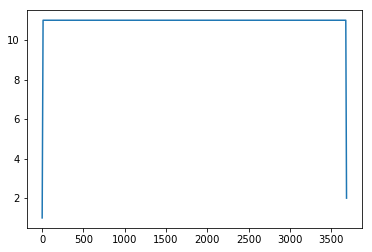

In [18]:
fig, ax = plt.subplots()

ax.plot(np.arange(len(plasmid)), delsize_of_average)

In [19]:
delbp_probs = np.array(delbp_probs)

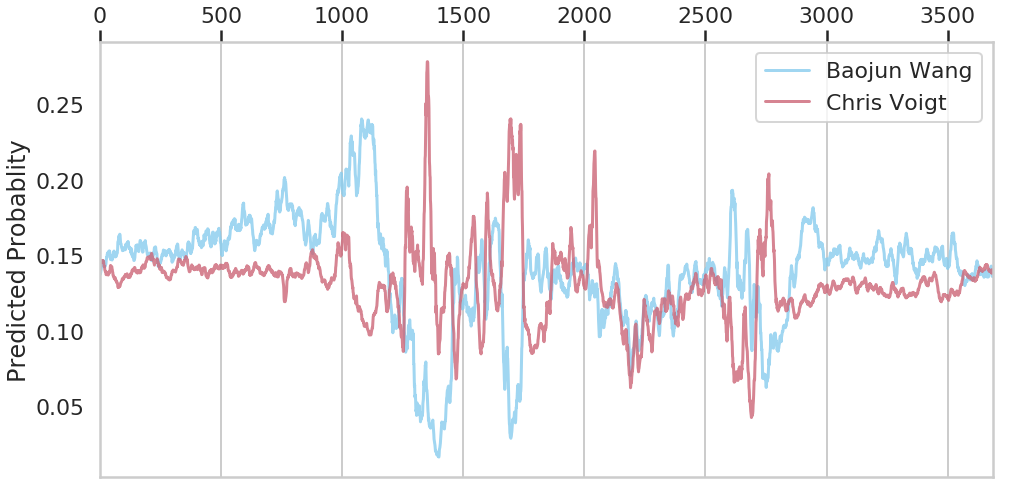

In [20]:
import warnings
warnings.filterwarnings("once")
set_pub_plot_context(context='poster')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,8))

window_size = 10
window = delwindow_info[delwindow_info['size'] == window_size]
window_logits = dellogits[window.index.values]

"""
window = window_info
window_logits = logits
"""

delbp_probs = []
delsize_of_average = []
for i in range(len(plasmid)):
    # select all subsequences which include this position
    delbp_logits = window_logits[ (i >= window['window_start']) & (i <= window['window_end'])]
    delsize_of_average.append(len(delbp_logits))
    delbp_probs.append(softmax(np.mean(delbp_logits, axis=0)))

delbp_probs = np.array(delbp_probs)
delwang = delbp_probs[:,91]
delvoigt = delbp_probs[:, 183]
pal = sns.color_palette()
ax.plot(np.arange(len(plasmid)), delwang, label="Baojun Wang", color=pal[0], alpha=.8)
ax.plot(np.arange(len(plasmid)), delvoigt, label="Chris Voigt", color=pal[1], alpha=.8)
ax.xaxis.tick_top()

ax.set_xlim(0, len(plasmid))
ax.set_ylabel('Predicted Probablity')
ax.yaxis.grid(False)
ax.legend(loc='upper right')


In [21]:
# Print the positions which make the model MORE likely to predict voigt when deleted, 1 indexed
print((np.argsort(delvoigt)[::-1] + 1)[:200])

[1354 1353 1355 1352 1351 1356 1350 1357 1358 1359 1348 1360 1349 1698
 1695 1696 1347 1697 1739 1693 1737 1694 1700 1740 1692 1699 1738 1735
 1691 1701 1736 1703 1702 1361 1705 1346 1690 1734 1704 1708 1707 1706
 2045 2044 1741 2043 1720 1733 1345 1689 1344 2046 2042 1721 1362 1732
 2041 1688 1718 1722 1363 1723 1717 1719 1716 1673 2040 1724 2763 1731
 1364 2047 1674 1687 2761 2762 1709 1710 1672 1365 1675 1725 1715 1742
 1677 2759 2758 1671 1676 1678 1343 2039 1686 2760 1730 2038 1270 1711
 2048 1679 1726 1743 2037 1670 1744 1267 1268 2764 1714 1727 1685 1601
 2757 1269 1680 1728 1681 1729 1712 1271 1684 2049 1682 1669 1602 2050
 1274 1342 2765 1713 1366 2766 2771 1668 1603 1683 1598 2767 1367 2770
 1266 1275 2036 2768 1600 2756 1272 1599 2769 1273 2772 1341 1667 1368
 1597 1340 2051 2755 1265 1545 1543 1546 1745 1544 1596 2754 1604 2773
 1547 2777 1606 1666 1548 2753 2778 2776 1542 1605 1276 2035 2052 2033
 2775 2032 1607 2023 2024 2774 1746 1287 2034 1946 1540 1339 1549 1539
 1541 

In [22]:
# Print the positions which make the model LESS likely to predict voigt when deleted, 1 indexed
print((np.argsort(delvoigt) + 1)[:200])

[2691 2692 2694 2690 2693 2696 2695 2689 2697 2688 2687 2698 2686 2684
 2699 2685 2700 2683 2682 2701 2192 2681 2193 2195 2620 2196 2623 2191
 2194 2702 2635 2704 2703 1472 2622 2648 2625 1473 2680 2649 1474 2190
 2197 2624 2619 2632 2636 2621 2628 1471 2626 2633 2198 2631 2187 2189
 2679 2647 2634 2618 2188 2637 2627 2650 2630 2678 2225 2629 2638 2705
 2200 2186 2199 2677 2644 2652 1475 2645 2224 2226 2640 2639 2646 2643
 2641 2651 2227 2223 2615 1470 2201 1469 2642 2185 2676 2228 2617 2184
 1476 2202 2616 2222 2229 2654 1468 1467 2230 2706 2655 2653 1477 2231
 2675 2707 2232 2183 2203 2614 2221 1466 2235 2237 2613 2204 2236 2233
 2234 2205 1399 1575 1785 1784 1401 1478 1786 2182 1789 1790 1787 1402
 1465 2656 2280 1783 1781 2674 2238 2220 1400 1574 1254 1573 2281 1788
 1464 1791 2673 2178 1782 2282 1792 1398 1793 1572 1571 1479 2219 1804
 1805 2672 2206 1803 2181 2239 1255 1579 2279 1252 1802 1794 1806 1795
 1798 1576 1780 2708 2180 1807 2612 1796 2177 1251 1778 2671 1253 1799
 1797 

In [23]:
# With temp scaling param
logits = np.load('../../../data/deteRNNt_exploration/JQ394803_scanning_subsequence_logits.npy') / 1.7226
logits.shape

(23770, 1314)

In [24]:
probs = softmax(logits, axis=1)

In [25]:
low_to_high = np.argsort(probs, axis=1)

In [26]:
low_to_high[:,-10:]

array([[1026, 1172, 1062, ...,  281, 1313,   35],
       [ 667,  791, 1206, ...,  622,  652,  912],
       [   1,  183, 1206, ...,  667,  912,   35],
       ...,
       [ 303,   27,  126, ..., 1236,  953, 1313],
       [1189, 1313,  741, ..., 1248,  527,  550],
       [ 958,  637, 1291, ..., 1236,  539, 1313]])

In [27]:
(low_to_high[:,-1] == 183).sum()

57

In [28]:
(low_to_high[:,-1] == 91).sum()

394

In [29]:
window_info = pickle.load(open('../../../data/deteRNNt_exploration/JQ394803_scanning_subsequence_window_info.pkl', 'rb'))

/home/sandias42/miniconda3/envs/attrib/lib/python3.6/site-packages/ipykernel_launcher.py:1: ResourceWarning:

unclosed file <_io.BufferedReader name='JQ394803_scanning_subsequence_window_info.pkl'>



In [30]:
window_info

,window_start,window_end
0,0,1024
1,1,1025
2,2,1026
3,3,1027
4,4,1028
5,5,1029
6,6,1030
7,7,1031
8,8,1032
9,9,1033


In [31]:
3685 - 1024

2661

In [32]:
window_info['size'] = window_info.apply(lambda row: row[1] -row[0], axis=1)

In [33]:
window_info

,window_start,window_end,size
0,0,1024,1024
1,1,1025,1024
2,2,1026,1024
3,3,1027,1024
4,4,1028,1024
5,5,1029,1024
6,6,1030,1024
7,7,1031,1024
8,8,1032,1024
9,9,1033,1024


In [34]:
window_info['size'].value_counts()

16      3670
32      3654
64      3622
128     3558
256     3430
512     3174
1024    2662
Name: size, dtype: int64

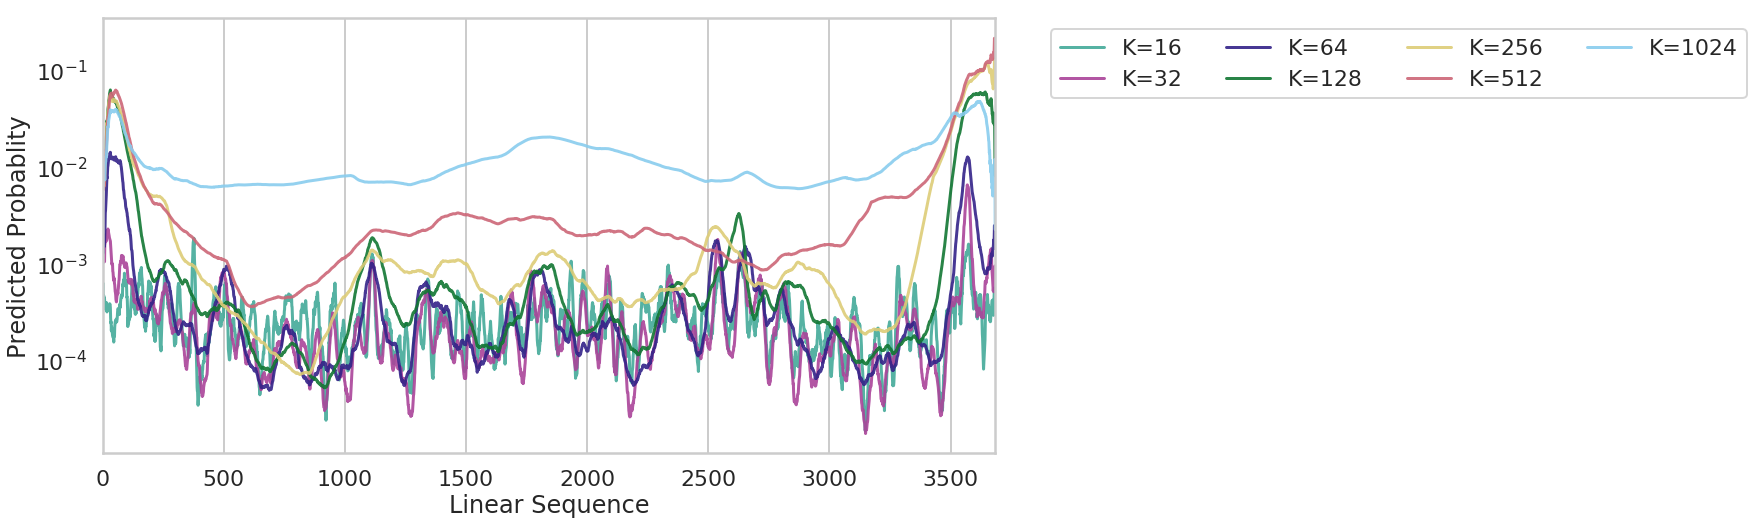

In [35]:
# Ok, so I have to average the window in order to get something over the linear sequence
set_pub_plot_context(context='poster')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,8))
for j, window_size in enumerate(reversed(window_info['size'].unique())):
    window = window_info[window_info['size'] == window_size]
    window_logits = logits[window.index.values]

    bp_probs = []
    size_of_average = []
    for i in range(len(plasmid)):
        # select all subsequences which include this position
        bp_logits = window_logits[ (i >= window['window_start']) & (i <= window['window_end'])]
        size_of_average.append(len(bp_logits))
        bp_probs.append(softmax(np.mean(bp_logits, axis=0)))
        
    bp_probs = np.array(bp_probs)

    voigt = bp_probs[:, 183]
    pal = sns.color_palette()
    ax.plot(np.arange(len(plasmid)), voigt, 
            label=f"K={window_size}", alpha=.9, color=pal[6-j],) #alpha=np.log(window_size) / np.log(1024), linewidth=5)
    
ax.set_xlim(0, len(plasmid))    
ax.set_xlabel('Linear Sequence')
ax.set_ylabel('Predicted Probablity')
ax.set_yscale('log')
ax.yaxis.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)

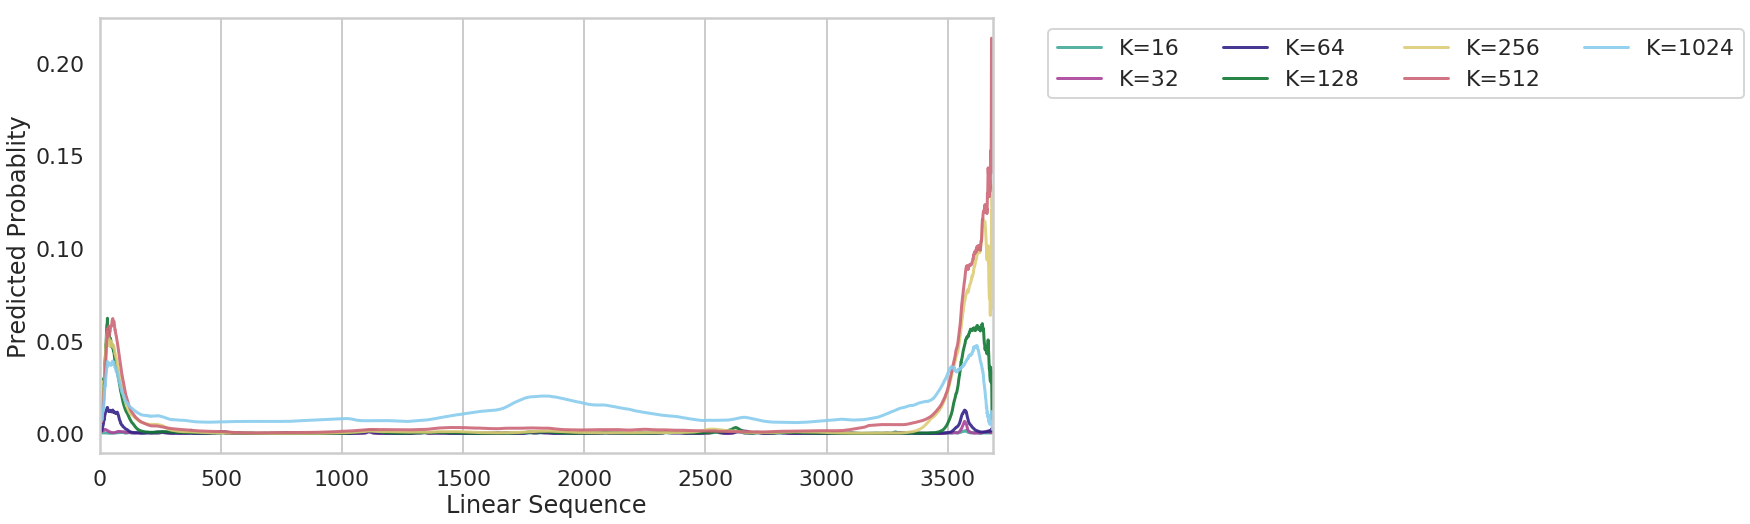

In [36]:
set_pub_plot_context(context='poster')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,8))
for j, window_size in enumerate(reversed(window_info['size'].unique())):
    window = window_info[window_info['size'] == window_size]
    window_logits = logits[window.index.values]

    bp_probs = []
    size_of_average = []
    for i in range(len(plasmid)):
        # select all subsequences which include this position
        bp_logits = window_logits[ (i >= window['window_start']) & (i <= window['window_end'])]
        size_of_average.append(len(bp_logits))
        bp_probs.append(softmax(np.mean(bp_logits, axis=0)))
        
    bp_probs = np.array(bp_probs)

    voigt = bp_probs[:, 183]
    pal = sns.color_palette()
    ax.plot(np.arange(len(plasmid)), voigt, 
            label=f"K={window_size}", alpha=.9, color=pal[6-j],) #alpha=np.log(window_size) / np.log(1024), linewidth=5)
    
ax.set_xlim(0, len(plasmid))    
ax.set_xlabel('Linear Sequence')
ax.set_ylabel('Predicted Probablity')
#ax.set_yscale('log')
ax.yaxis.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)